In [199]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.autolayout"] = True
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import warnings
warnings.filterwarnings('ignore') #, "\nPyarrow", DeprecationWarning)
from matplotlib.patches import Circle, Rectangle

In [200]:
file1 = r'DeviceData.csv'
df = pd.read_csv(file1)
dataset = df.values
X = dataset[:, 0]
Y = dataset[:, 1]
data = list(zip(X, Y))
print(data)
print(np.mean(Y))

[(np.float64(0.0), np.float64(70.79357057401127)), (np.float64(1.0), np.float64(70.7954916762551)), (np.float64(2.0), np.float64(70.7954916762551)), (np.float64(3.0), np.float64(70.79768548307777)), (np.float64(4.0), np.float64(70.79768548307777)), (np.float64(5.0), np.float64(70.80017489278251)), (np.float64(6.0), np.float64(70.80017489278251)), (np.float64(7.0), np.float64(70.80239236996246)), (np.float64(8.0), np.float64(70.80239236996246)), (np.float64(9.0), np.float64(70.80481099438428)), (np.float64(10.0), np.float64(70.80481099438428)), (np.float64(11.0), np.float64(70.80721016944338)), (np.float64(12.0), np.float64(70.80721016944338)), (np.float64(13.0), np.float64(70.80949105475769)), (np.float64(14.0), np.float64(70.80949105475769)), (np.float64(15.0), np.float64(70.80971529077493)), (np.float64(16.0), np.float64(70.81171814737459)), (np.float64(17.0), np.float64(70.81407290766546)), (np.float64(18.0), np.float64(70.81407290766546)), (np.float64(19.0), np.float64(70.815058124

[248861675.0418418, 62235709.28638271, 27675787.870418716, 15576318.927201277, 9975451.818348868, 6933068.180022406, 5095305.572616152, 3904064.5271843215, 3086144.956225895, 2502998.5235938723]


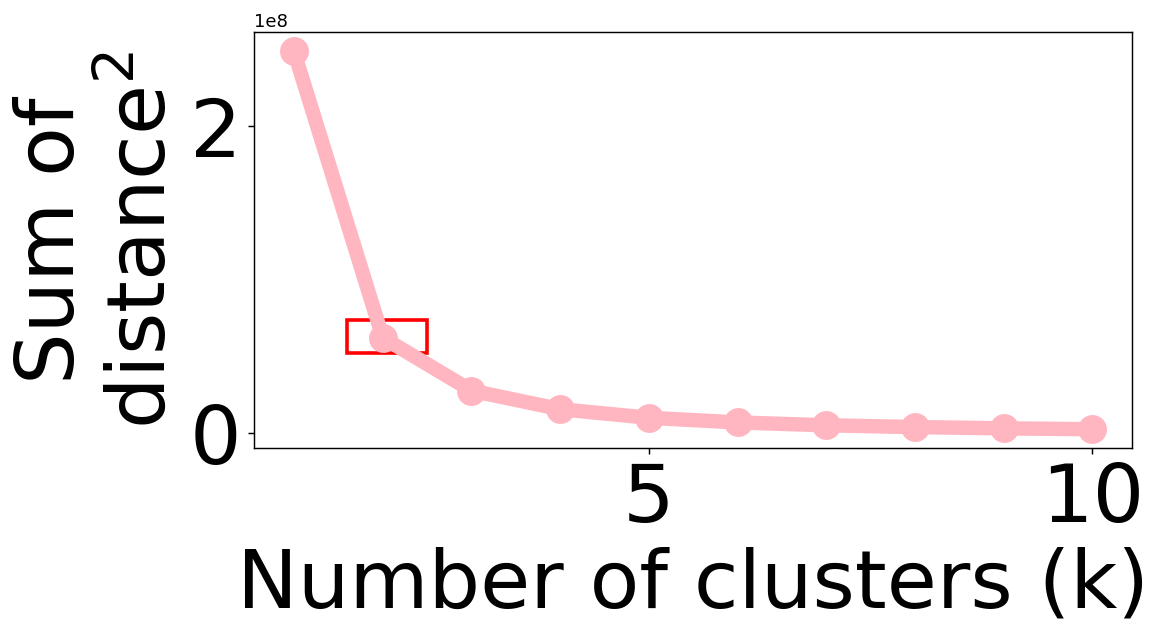

In [201]:
inertias = []

for i in range(1,11):
    #kmeans = KMeans(n_clusters=i)
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)
print(inertias)
fig, ax = plt.subplots(figsize=(9, 5), dpi=130)
plt.subplot().tick_params(labelsize=45)
#circle1=plt.Circle(xy=(2,50000000), radius = 0.2, color='r', linewidth = .3, fill = False )

xlab1 = ['Number of']
xlab2 = ['clusters (k)']
ylab1 = ['Sum of']
ylab2 = ["distance$^2$"]
row_labels = [f"{x1} {x2}" for x1, x2, in zip(xlab1,xlab2)]
col_labels = [f"{y1}\n{y2}" for y1, y2, in zip(ylab1,ylab2)]
plt.plot(range(1,11), inertias, marker='o', markersize=15, color='lightpink', linewidth=8)
plt.xlabel(row_labels[0].replace('\$\$',''), fontsize=45)
plt.ylabel(col_labels[0].replace('\$\$',''), fontsize=45)
#plt.show()
rectangle = plt.Rectangle((1.6,52000000), .9,22000000,linewidth = 2, color='red', fill=False)  # fill=False for just the outline
ax.add_artist(rectangle)
plt.savefig("number_of_cpu_cluster_centroids.pdf", format="pdf", bbox_inches="tight")

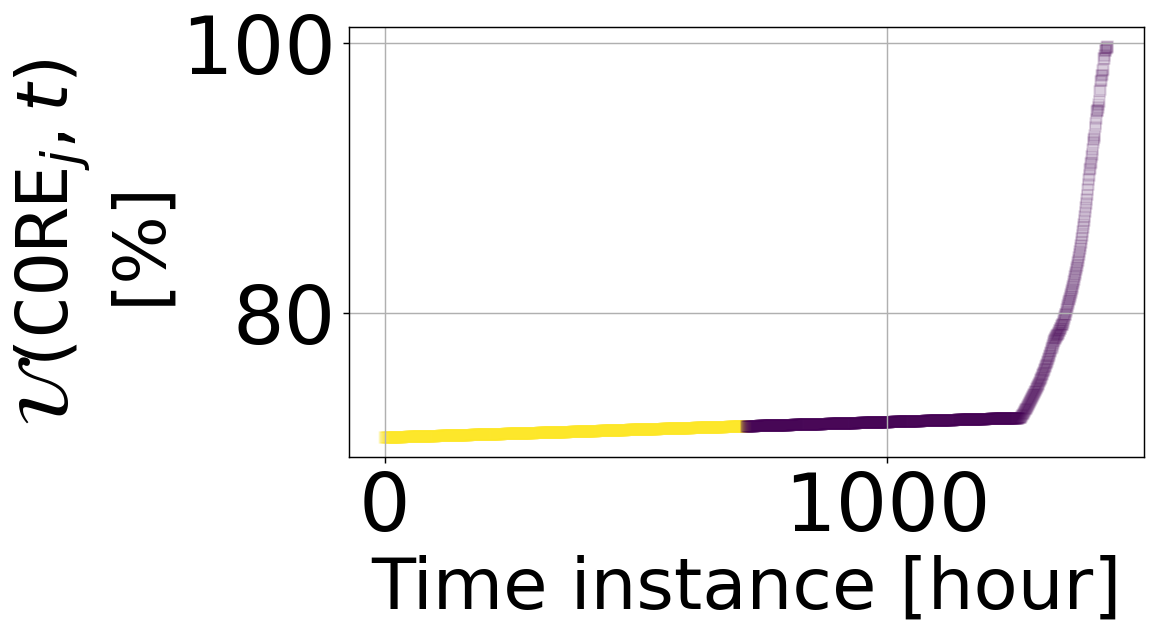

In [202]:
#kmeans = KMeans(n_clusters=2)
kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
kmeans.fit(data)
# k_means_labels = k_means.labels_
# k_means_cluster_centers = k_means.cluster_centers_
# k_means_labels_unique = np.unique(k_means_labels)

fig, ax = plt.subplots(figsize=(9, 5), dpi=130)
plt.subplot().tick_params(labelsize=45)
plt.xlabel('Time instance [hour]', fontsize=40)
ylab1 = ['$\mathcal{U}(\mathtt{CORE}_j, t)$']
ylab2 = ["[%]"]
col_labels = [f"{x1}\n{x2}" for x1, x2, in zip(ylab1,ylab2)]
plt.ylabel(col_labels[0].replace('\$\$',''), fontsize=40)
plt.scatter(X, Y, c=kmeans.labels_, marker="s",alpha=0.1)
plt.grid(True)

#plt.show()
plt.savefig("k-means_labels.pdf", format="pdf", bbox_inches="tight")

In [203]:
print(kmeans.cluster_centers_)

[[1078.5          74.43436061]
 [ 358.5          71.20338755]]


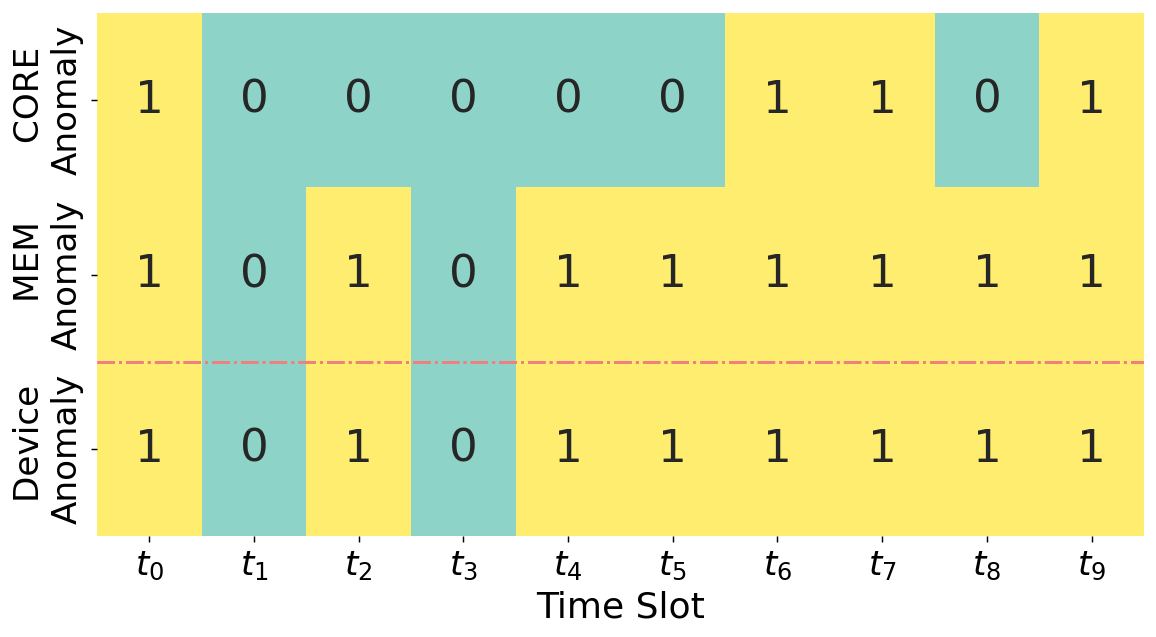

In [204]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Given vectors
CORE_anomaly = np.array([1,0,0,0,0,0,1,1,0,1])
MEM_anomaly = np.array([1,0,1,0,1,1,1,1,1,1])
anomaly_bits = np.logical_or(CORE_anomaly, MEM_anomaly).astype(int)  # OR operation

# Create a 2D array
data = np.vstack([CORE_anomaly, MEM_anomaly, anomaly_bits])

# Labels for rows
xlab1 = ["CORE  ","MEM  ","Device "]
xlab2 = ["Anomaly","Anomaly","Anomaly"]
row_labels = [f"{x1}\n{x2}" for x1, x2, in zip(xlab1,xlab2)]
#row_labels = ["CORE Anomaly", "MEM Anomaly", "Device Anomaly"]
col_labels = [f"$t_{i}$" for i in range(len(CORE_anomaly))]  # Generates ['t0', 't1', ..., 't9']

# Plot heatmap
fig, ax = plt.subplots(figsize=(9, 5), dpi=130)
plt.subplot().tick_params(labelsize=19)
ax.hlines([2], color='lightcoral', xmin=0, xmax=10, linestyles='dashdot')
ax.hlines([2], color='lightcoral', xmin=0, xmax=10, linestyles='dashdot')
ax.hlines([2], color='lightcoral', xmin=0, xmax=10, linestyles='dashdot')
sns.heatmap(data, cmap="Set3", annot=True, cbar=False, xticklabels=col_labels, yticklabels=row_labels, annot_kws={"size": 25} )
# cmap="PiYG", cmap="YlGnBu", cmap="Blues", cmap="coolwarm", cmap="BuPu", cmap="Greens", cmap="Oranges", cmap="Reds", cmap="Purples", cmap="YlOrBr"
plt.xlabel("Time Slot", fontsize=20)

#plt.show()
plt.savefig("anomaly_bits.pdf", format="pdf", bbox_inches="tight")